In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Creating a temporal signal

We have here a temporal series with a sin curve. We will remove the 9th element of the signal, as if our tool couldn't receive it, or had a problem at that time

In [2]:
# create array
num_of_records = 20

x = pd.Series(np.linspace(0, 2 * np.pi, num_of_records))
y = pd.Series(20 * np.sin(x))

In [3]:
# choose item to be removed
i = 8

# keep original values
y_original = y[i]

# remove values from our data
y[i] = np.nan

Text(0.5, 1.0, 'Original signal received')

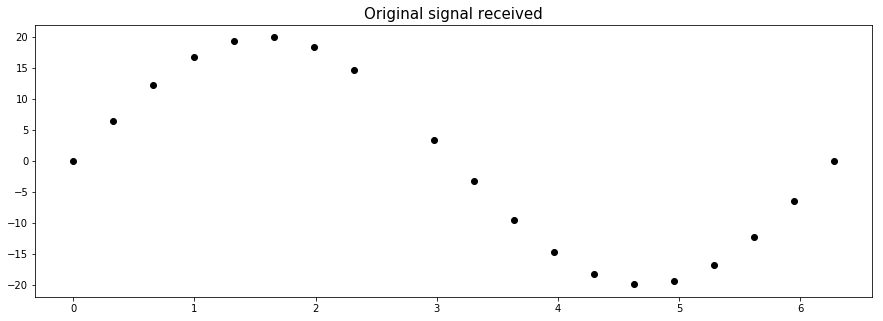

In [4]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.title('Original signal received with missing data', fontsize=15)

Text(0.5, 1.0, 'Original signal send')

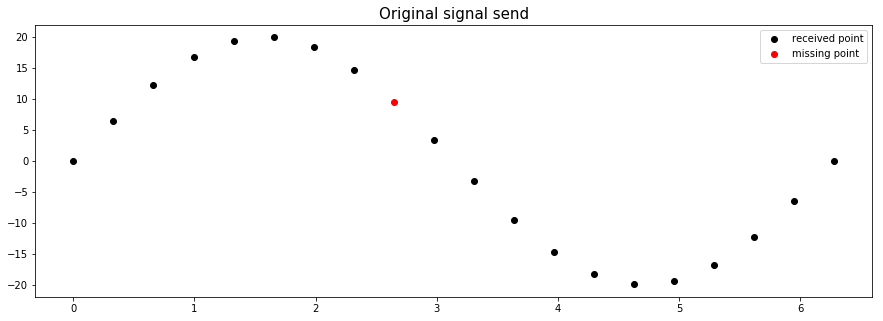

In [5]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.plot(x[i], y_original, 'or')
plt.legend(['received data point', 'missing data point'])
plt.title('Original signal sent', fontsize=15)

# Dealing with missing numbers in a linear way

If our signal is typical linear signal (or close to it) we can simply get the mean of the value before and the value after. Since our curve is not linear, we have a small difference, but still close enough to make this predicted value very good for us.

In [6]:
yi_calculated = np.mean([y[i-1], y[i+1]])

print(y_original - yi_calculated)

0.5157628512028154


Text(0.5, 1.0, 'Signal')

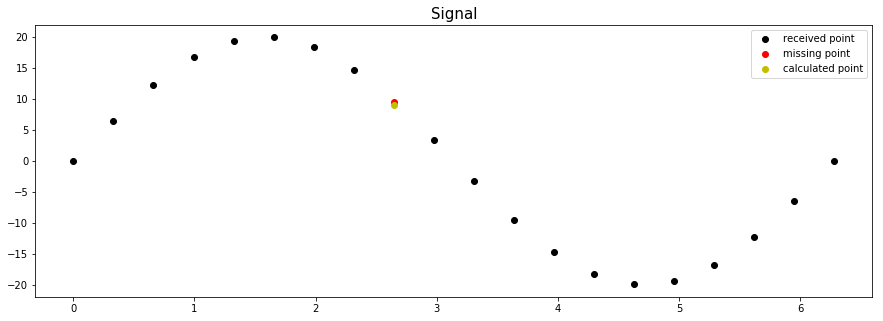

In [7]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.plot(x[i], y_original, 'or')
plt.plot(x[i], yi_calculated, 'oy')

plt.legend(['received point', 'missing point', 'calculated point'])
plt.title('Temporal signal - Linear Interpolation', fontsize=15)

Obviously we have a more optimized way of doing this. 

In [8]:
yi = pd.Series(y)
yi = yi.interpolate()
print(y_original - yi[i])

0.5157628512028154


# Dealing with missing data using the mean


If we think that our data doesn't fit in a linear pattern, we could use a strategy that will not modify our main statistics, such as replacing it by its average

In [9]:
yi_calculated = y.mean()

print(y_original - yi_calculated)

10.019945116569971


Text(0.5, 1.0, 'Signal')

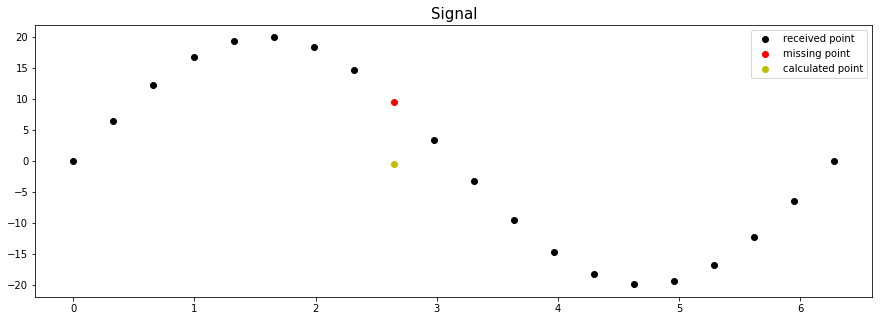

In [10]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.plot(x[i], y_original, 'or')
plt.plot(x[i], yi_calculated, 'oy')

plt.legend(['received point', 'missing point', 'interpolated point'])
plt.title('Temporal signal - Filling data with mean', fontsize=15)

Of course, for this data this doesn't seem to make any sense. However, what if your data presented no real pattern to be seen?

In [11]:
noise = pd.Series([ 0.11604849,  0.9568581 , -0.83154595,  0.87675812,  0.55517057,
                    0.38539126, -0.78490851,  1.52722683, -1.53470131,  0.10656216,
                   -0.09696747, -0.95508694, -0.46314156,  1.07489003,  0.11527739,
                    0.66840295, -1.38479986, -1.70442386, -0.74144102,  0.67423001])

Text(0.5, 1.0, 'Random Signal')

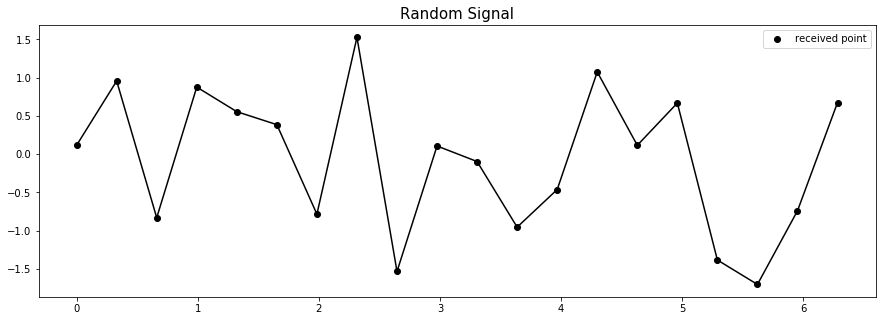

In [12]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x, noise, '-k')

plt.title('Random signal sent', fontsize=15)

In [13]:
i = 14
noise_original = noise[i]
noise[i] = np.nan

Text(0.5, 1.0, 'Random Signal')

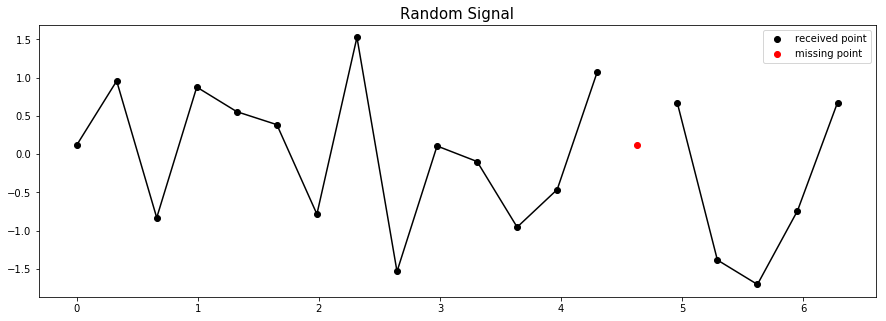

In [14]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x, noise, '-k')

plt.legend(['received data point', 'missing data point'])
plt.title('Random Signal received with missing data', fontsize=15)

In [15]:
noise_interpolate = noise.interpolate()

Text(0.5, 1.0, 'Random Signal')

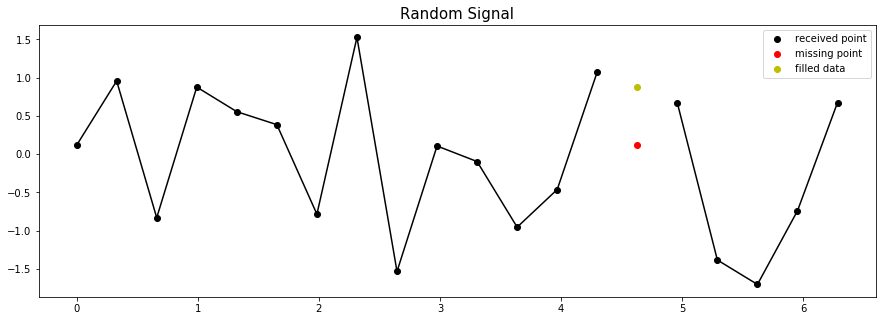

In [16]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_interpolate[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['received point', 'missing point', 'filled data'])
plt.title('Random Signal', fontsize=15)

So, this doesn't sound good...

One possible strategy is to replace all missing values by the mean value of the series. Unfortunately, this strategy can severely distort the distribution for this variable, leading to complications with summary measures including, notably, underestimates of the standard deviation.

In [17]:
print('Mean before interp:', noise.mean())
print('Mean after interp:', noise.interpolate().mean())

Mean before interp: -0.08186726105263156
Mean after interp: -0.034191573500000016


In [18]:
comparison = pd.DataFrame({'original': noise, 'interpolated': noise_interpolate})
comparison.describe()

,original,interpolated
count,19.000000,20.000000
mean,-0.081867,-0.034192
std,0.960297,0.958695
min,-1.704424,-1.704424
25%,-0.808227,-0.796568
50%,0.106562,0.111305
75%,0.671316,0.723584
max,1.527227,1.527227


Thus, we can use the mean value of the series as an approximation, to fill our data and keep our mean just the same! On our example, the values were a pretty good approximation, but things could not be as good.

In [19]:
noise_fillna = noise.fillna(noise.mean())

Text(0.5, 1.0, 'Random Signal')

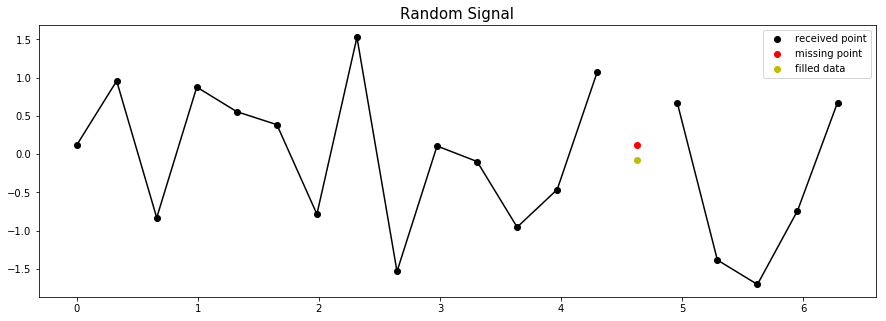

In [20]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_fillna[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['received data point', 'missing data point', 'filled data point'])
plt.title('Random Signal - Filling with mean', fontsize=15)

In [21]:
comparison = pd.DataFrame({'original': noise, 'filled': noise_fillna})
comparison.describe()

,original,filled
count,19.000000,20.000000
mean,-0.081867,-0.081867
std,0.960297,0.934685
min,-1.704424,-1.704424
25%,-0.808227,-0.796568
50%,0.106562,0.012347
75%,0.671316,0.669860
max,1.527227,1.527227


# Dealing with missing data using another point

In [22]:
noise_ffill = noise.fillna(method='ffill')

Text(0.5, 1.0, 'Random Signal')

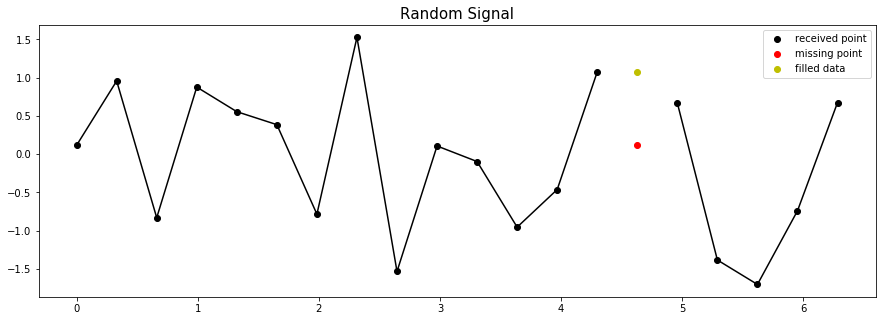

In [23]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_ffill[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['received point', 'missing point', 'filled data'])
plt.title('Random Signal - Filling with last value', fontsize=15)

In [24]:
noise_bfill = noise.fillna(method='bfill')

Text(0.5, 1.0, 'Random Signal')

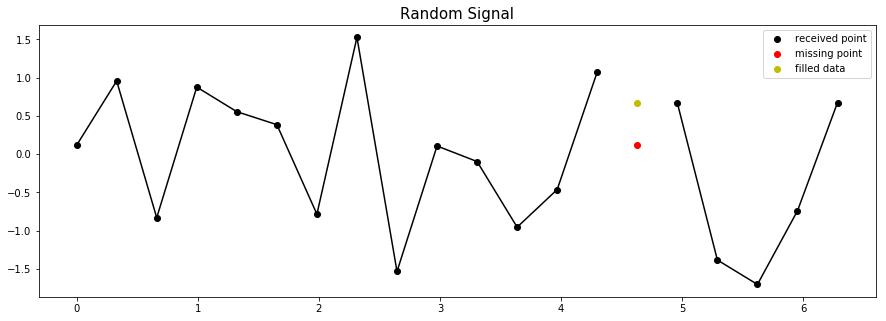

In [25]:
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_bfill[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['received point', 'missing point', 'filled data'])
plt.title('Random Signal - Filling with next point', fontsize=15)

# Comparison of statistics between methods

In [26]:
comparison = pd.DataFrame({
    'original': noise, 
    'linear_interpolation': noise_interpolate,
    'mean_fill': noise_fillna,
    'backward_fill': noise_bfill,
    'forward_fill': noise_ffill
})
comparison.describe()

,original,linear_interpolation,mean_fill,backward_fill,forward_fill
count,19.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.081867,-0.034192,-0.081867,-0.044354,-0.024029
std,0.960297,0.958695,0.934685,0.949622,0.969815
min,-1.704424,-1.704424,-1.704424,-1.704424,-1.704424
25%,-0.808227,-0.796568,-0.796568,-0.796568,-0.796568
50%,0.106562,0.111305,0.012347,0.111305,0.111305
75%,0.671316,0.723584,0.669860,0.669860,0.724862
max,1.527227,1.527227,1.527227,1.527227,1.527227


www.stat.columbia.edu/~gelman/arm/missing.pdf